<a href="https://colab.research.google.com/github/abuhurera8320/Hate_Speech_Detection/blob/MultiClass-Classification/Roman_Urdu_Hate_Speech_Detection(Multi_Class).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [66]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential,load_model
from keras.layers import Conv1D,LSTM,Dense,Embedding,RepeatVector,TimeDistributed,Bidirectional,GRU,SimpleRNN
from keras.callbacks import EarlyStopping
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from nltk.translate.bleu_score import corpus_bleu
from IPython.display import Markdown, display
from keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.text import text_to_word_sequence
# check version number
import imblearn
print(imblearn.__version__)
from imblearn.over_sampling import SMOTE

0.8.1


In [67]:
df=pd.read_csv('/content/drive/MyDrive/FYP /Multiclass.csv')

In [68]:
df.shape

(9210, 3)

In [69]:
df['Label'].unique()

array([1, 0, 2, 4, 3])

In [70]:
df.head()

,Unnamed: 0,Text,Label
0,0,ni ab to jo marzi ho jay biyah tum say he kar...,1
1,1,kaayar means leftists jo randiyo ki tarah rone...,0
2,2,kya samjh nhi aaya mochi..saf or seedhi baat h...,0
3,3,itni syani kb sy ho gai tum😂😂,1
4,4,tou phir baji dedo usko apnii kisii nachnay wa...,0


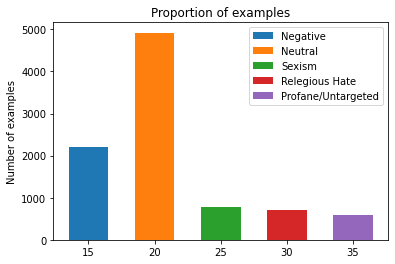

In [71]:
Neu = df[df['Label'] == 1].shape[0]
Neg = df[df['Label'] == 0].shape[0]
RH = df[df['Label'] == 2].shape[0]
Sm = df[df['Label'] == 3].shape[0]
Profane = df[df['Label'] == 4].shape[0]
# bar plot of the 3 classes
plt.bar(15,Neg,3, label="Negative")
plt.bar(20,Neu,3, label="Neutral")
plt.bar(25,Sm,3, label="Sexism")
plt.bar(30,RH,3, label="Relegious Hate")
plt.bar(35,Profane,3, label="Profane/Untargeted")
plt.legend()
plt.ylabel('Number of examples')
plt.title('Proportion of examples')
plt.show()

## Data Preprocessing
#### 1. Removing Punctuations
#### 2. Converting to Lower case
#### 3. Removing stopwords


In [72]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [73]:
import re
def remove_punct(text):
    ''' Input parameter:
    text: (str)
    this method is used to take each text line and check the characters if it
    contains any puntuation and then remove them with blank space'''  
    text  = "".join([char for [char] in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text


In [74]:
# removing all the punctuation
df['Text'] = df['Text'].apply(lambda x: remove_punct(str(x))) 

In [75]:
def convert_to_lower_case(text):
    ''' Input parameter:
    text: (str)
    this method is used to take each text line and converts the characters  into lower case and joins them further'''
    text  = "".join([char.lower() for [char] in text if char not in string.punctuation])
    return text


In [76]:
df['Text'] = df['Text'].apply(lambda x: convert_to_lower_case(str(x))) #calling lower case on each line

In [77]:
stopwords=['ai', 'ayi', 'hy', 'hai', 'main', 'ki', 'tha', 'koi', 'ko', 'sy', 'woh', 'bhi', 'aur', 'wo', 'yeh', 'rha', 
           'hota', 'ho', 'ga', 'ka', 'le', 'lye', 'kr', 'kar', 'lye', 'liye', 'hotay', 'waisay', 'gya', 'gaya', 'kch',
           'ab', 'thy', 'thay', 'houn', 'hain', 'han', 'to','is', 'hi', 'jo', 'kya', 'thi', 'se', 'pe', 'phr', 'wala',
           'waisay', 'us', 'na', 'ny', 'hun', 'rha', 'raha', 'ja', 'rahay', 'abi', 'uski', 'ne', 'haan', 'acha', 'nai',
           'sent', 'you', 'kafi', 'gai', 'rhy', 'kuch', 'jata', 'aye', 'ya', 'dono', 'hoa', 'aese', 'de', 'wohi',
           'jati', 'jb', 'krta', 'lg', 'rahi', 'hui', 'karna', 'krna', 'gi', 'hova', 'yehi', 'jana', 'jye', 'chal', 'mil',
           'tu', 'hum', 'par', 'hay', 'kis', 'sb', 'gy', 'dain', 'krny', 'tou','h','je','or','jee','he','in','un','kay','ki','ya','ap','meri','me']


In [78]:
dictStopWords = {} # global variable
forFastTextData = []
def removeStopWordss(text):
    text = re.sub('[^a-zA-Z]',' ',str(text))
    text = text.lower()
    wordList =str(text).split()
    for word in wordList:
        if word in stopwords:
            wordList.remove(word)
            if word not in dictStopWords:
                dictStopWords[word]= 1
            else:
                dictStopWords[word] = dictStopWords[word] + 1
    newSentence = " ".join(wordList)
    forFastTextData.append(newSentence.split())
    return (newSentence)

In [79]:
df['Text'] = df['Text'].apply(lambda x: removeStopWordss(x)) # sentence with removed stop words

In [80]:
## checking for most common stopwords from the dictionary
import collections
from collections import Counter
dictGraph = {}
d = Counter(dictStopWords) # creating a counter 
d.most_common(10) 
for k,v in d.most_common(10):
    dictGraph[k] = v
dictGraph

{'hai': 2440,
 'ki': 2203,
 'ko': 1807,
 'ka': 1488,
 'to': 1357,
 'ho': 1151,
 'se': 1128,
 'hain': 771,
 'me': 728,
 'na': 715}

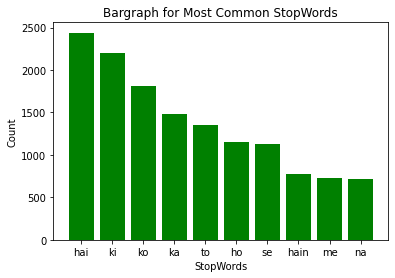

In [81]:
#plotting a graph of 10 most common stopwords from dictionary
plt.bar(dictGraph.keys(), dictGraph.values(), align='center', color = 'green')
plt.title('Bargraph for Most Common StopWords')
plt.xlabel('StopWords')
plt.ylabel('Count')
plt.show()

Tokenization and Test Train Split

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
X=df['Text']
y=df['Label']
X.shape

(9210,)

In [84]:
count = df['Text'].str.split().apply(len)
count=count.sort_values(axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last', ignore_index=False, key=None)
MAX_SEQUENCE_LENGTH=count.iloc[0]+10
MAX_SEQUENCE_LENGTH

66

In [85]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocab_size)

Vocabulary Size : 21808


In [86]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [87]:

X_train = pad_sequences((tokenizer.texts_to_sequences(X_train)),
                        maxlen = MAX_SEQUENCE_LENGTH)
X_test = pad_sequences(tokenizer.texts_to_sequences(X_test),
                      maxlen = MAX_SEQUENCE_LENGTH)

print("Training X Shape:",X_train.shape)
print("Testing X Shape:",X_test.shape)

Training X Shape: (7368, 66)
Testing X Shape: (1842, 66)


In [88]:
X_train[X_train.shape[0]-1]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,   490,   857,    25,   213,    48,
       19041,  5360,  1426], dtype=int32)

In [89]:
# oversample=SMOTE()
# X_train, y_train = oversample.fit_resample(X_train, y_train)

In [90]:
X_train[X_train.shape[0]-1]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,   490,   857,    25,   213,    48,
       19041,  5360,  1426], dtype=int32)

In [91]:
print(f'train data:{X_train.shape}, train labels:{y_train.shape},test data:{X_test.shape}, test labels:{y_test.shape}')

train data:(7368, 66), train labels:(7368,),test data:(1842, 66), test labels:(1842,)


In [92]:
y_train.value_counts()

1    3958
0    1746
3     594
2     583
4     487
Name: Label, dtype: int64

## Importing Pretrained Word2vec embeddings

In [93]:
# load embeding for text file
embeddings_index1 = dict()
f = open('/content/drive/MyDrive/FYP /vectors500000.txt')

for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index1[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index1))

Loaded 31308 word vectors.


In [94]:
# load embeding for text file
embeddings_index2 = dict()
f = open('/content/drive/MyDrive/FYP /word2vec_RU.txt')

for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index2[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index2))

Loaded 20838 word vectors.


In [95]:
count=0
wordcount1=0
wordcount2=0
dims=100
flag=1
#word_index = {w: i for i, w in enumerate(embeddings_index, 1)}
embedding_matrix = np.zeros((len(word_index)+1, dims))
for word, i in word_index.items():
  if word in embeddings_index1.keys():
    embedding_vector = embeddings_index1.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector[:dims]
        wordcount1 +=1
        
  elif word in embeddings_index2.keys():
        embedding_vector = embeddings_index2.get(word)
        if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
         embedding_matrix[i] = embedding_vector[:dims]
         wordcount2 +=1
        
  else:
     count +=1
     
      

In [96]:
print('Embedding Stats :')
print(f'Words found in first embedding: {wordcount1}')
print(f'Words found in second embedding: {wordcount2}')
print(f'Words not found in any embedding: {count}')
print(f'Total words found in both embeddings: {wordcount1+wordcount2}')

Embedding Stats :
Words found in first embedding: 9854
Words found in second embedding: 11214
Words not found in any embedding: 739
Total words found in both embeddings: 21068


In [97]:
embedding_matrix.shape

(21808, 100)

In [98]:
no_of_classes = len(df['Label'].unique())
no_of_classes

5

##**Simple RNN's**

In [99]:
#%%time
#with strategy.scope():
    # A simpleRNN without any pretrained embeddings and one dense layer
model = Sequential()
model.add(Embedding(embedding_matrix.shape[0],embedding_matrix.shape[1],weights=[embedding_matrix],input_length=MAX_SEQUENCE_LENGTH,trainable=False))
model.add(Dropout(0.2))
model.add(SimpleRNN(20))
model.add(Dropout(0.2))
model.add(Dense(200,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(no_of_classes, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 66, 100)           2180800   
                                                                 
 dropout_2 (Dropout)         (None, 66, 100)           0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 20)                2420      
                                                                 
 dropout_3 (Dropout)         (None, 20)                0         
                                                                 
 dense_9 (Dense)             (None, 200)               4200      
                                                                 
 dense_10 (Dense)            (None, 100)               20100     
                                                                 
 dense_11 (Dense)            (None, 5)                

In [100]:
history=model.fit(X_train, y_train, epochs=5, batch_size=128,validation_data=(X_test, y_test),verbose=1)

Epoch 1/5
58/58 [==============================] - 4s 60ms/step - loss: 1.2957 - accuracy: 0.5221 - val_loss: 1.2606 - val_accuracy: 0.5337
Epoch 2/5
58/58 [==============================] - 3s 57ms/step - loss: 1.2501 - accuracy: 0.5375 - val_loss: 1.2441 - val_accuracy: 0.5380
Epoch 3/5
58/58 [==============================] - 3s 56ms/step - loss: 1.2381 - accuracy: 0.5419 - val_loss: 1.2376 - val_accuracy: 0.5402
Epoch 4/5
58/58 [==============================] - 3s 56ms/step - loss: 1.2354 - accuracy: 0.5432 - val_loss: 1.2236 - val_accuracy: 0.5456
Epoch 5/5
58/58 [==============================] - 5s 85ms/step - loss: 1.2275 - accuracy: 0.5482 - val_loss: 1.2193 - val_accuracy: 0.5516


In [101]:
from sklearn import metrics

In [102]:
y_pred = model.predict(X_test)
print(y_pred.shape)
y_pred = np.argmax(y_pred, axis=1)
print(y_pred.shape)
metrics.accuracy_score(y_test, y_pred)

(1842, 5)
(1842,)


0.5515743756786102

In [103]:
print("classification report:")
print(metrics.classification_report(y_test, y_pred))#, target_names=target_names))

classification report:
              precision    recall  f1-score   support

           0       0.66      0.09      0.16       464
           1       0.54      0.99      0.70       963
           2       0.00      0.00      0.00       136
           3       0.84      0.09      0.16       177
           4       0.00      0.00      0.00       102

    accuracy                           0.55      1842
   macro avg       0.41      0.24      0.21      1842
weighted avg       0.53      0.55      0.42      1842



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [104]:
print("confusion matrix: ")
print(metrics.confusion_matrix(y_test, y_pred))

confusion matrix: 
[[ 42 419   0   3   0]
 [  5 958   0   0   0]
 [  3 133   0   0   0]
 [  2 159   0  16   0]
 [ 12  90   0   0   0]]


Text(0.5, 1.0, 'Loss evolution')

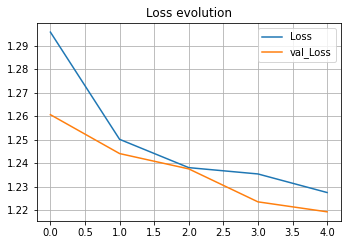

In [105]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.legend()
plt.grid()
plt.title('Loss evolution')


Text(0.5, 1.0, 'Accuracy evolution')

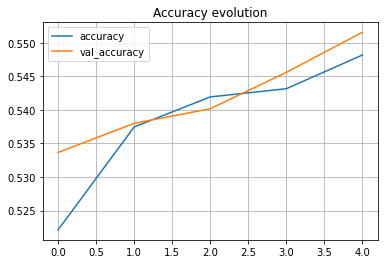

In [106]:
plt.subplot(1, 1, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.grid()
plt.title('Accuracy evolution')

## **Bi-Directional LSTM**

In [107]:

model = Sequential()

# Keras Embedding layer with Word2Vec weights initialization
model.add(Embedding(embedding_matrix.shape[0],embedding_matrix.shape[1],weights=[embedding_matrix],input_length=MAX_SEQUENCE_LENGTH,trainable=False))

#model.add(Dropout(0.25))
#model.add(Conv1D(128, 3, activation='relu'))
model.add(Bidirectional(LSTM(300)))
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(no_of_classes,activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
#ReduceLROnPlateau = ReduceLROnPlateau(factor=0.1, min_lr = 0.01, monitor = 'val_loss',verbose = 1)
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 66, 100)           2180800   
                                                                 
 bidirectional_2 (Bidirectio  (None, 600)              962400    
 nal)                                                            
                                                                 
 dense_12 (Dense)            (None, 512)               307712    
                                                                 
 dense_13 (Dense)            (None, 256)               131328    
                                                                 
 dense_14 (Dense)            (None, 5)                 1285      
                                                                 
Total params: 3,583,525
Trainable params: 1,402,725
Non-trainable params: 2,180,800
____________________________________

In [108]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128,
                    validation_data=(X_test, y_test), verbose=1)

Epoch 1/10
58/58 [==============================] - 5s 46ms/step - loss: 1.1836 - accuracy: 0.5719 - val_loss: 1.1323 - val_accuracy: 0.6004
Epoch 2/10
58/58 [==============================] - 2s 27ms/step - loss: 0.8329 - accuracy: 0.6949 - val_loss: 1.2173 - val_accuracy: 0.5983
Epoch 3/10
58/58 [==============================] - 2s 27ms/step - loss: 0.5203 - accuracy: 0.8175 - val_loss: 1.3750 - val_accuracy: 0.5831
Epoch 4/10
58/58 [==============================] - 2s 27ms/step - loss: 0.3097 - accuracy: 0.8966 - val_loss: 1.8486 - val_accuracy: 0.5065
Epoch 5/10
58/58 [==============================] - 2s 27ms/step - loss: 0.2135 - accuracy: 0.9293 - val_loss: 2.0360 - val_accuracy: 0.5434
Epoch 6/10
58/58 [==============================] - 2s 27ms/step - loss: 0.1551 - accuracy: 0.9460 - val_loss: 2.0868 - val_accuracy: 0.5689
Epoch 7/10
58/58 [==============================] - 2s 27ms/step - loss: 0.1020 - accuracy: 0.9673 - val_loss: 2.3706 - val_accuracy: 0.5831
Epoch 8/10
58

In [109]:
y_pred = model.predict(X_test)
print(y_pred.shape)
y_pred = np.argmax(y_pred, axis=1)
print(y_pred.shape)
accuracy=metrics.accuracy_score(y_test, y_pred)
print(f'Accuracy of Bi-Lstm is {accuracy:.2f}%')

(1842, 5)
(1842,)
Accuracy of Bi-Lstm is 0.58%


In [110]:
print("classification report:")
print(metrics.classification_report(y_test, y_pred))#, target_names=target_names))

classification report:
              precision    recall  f1-score   support

           0       0.48      0.43      0.45       464
           1       0.70      0.79      0.74       963
           2       0.31      0.26      0.28       136
           3       0.33      0.27      0.30       177
           4       0.22      0.20      0.21       102

    accuracy                           0.58      1842
   macro avg       0.41      0.39      0.40      1842
weighted avg       0.56      0.58      0.56      1842



In [111]:
print("confusion matrix: ")
print(metrics.confusion_matrix(y_test, y_pred))

confusion matrix: 
[[199 161  30  39  35]
 [110 757  35  37  24]
 [ 28  54  36  13   5]
 [ 51  62  11  48   5]
 [ 26  42   6   8  20]]


Text(0.5, 1.0, 'Loss evolution')

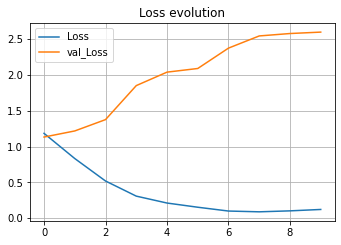

In [112]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.legend()
plt.grid()
plt.title('Loss evolution')

Text(0.5, 1.0, 'Accuracy evolution')

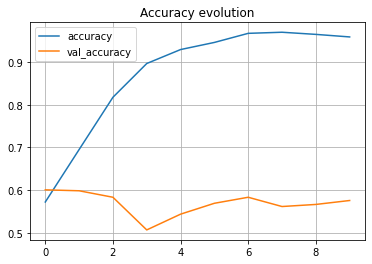

In [113]:
plt.subplot(1, 1, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.grid()
plt.title('Accuracy evolution')

# **GRU's**

In [114]:
   # GRU with Word2Vec embeddings and two dense layers
model = Sequential()
model.add(Embedding(embedding_matrix.shape[0],embedding_matrix.shape[1],weights=[embedding_matrix],input_length=MAX_SEQUENCE_LENGTH,trainable=False))
#model.add(SpatialDropout1D(0.3))
model.add(Bidirectional(GRU(300,dropout=0.3)))
model.add(Dense(512,activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(no_of_classes, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',metrics=['accuracy'])   
    
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 66, 100)           2180800   
                                                                 
 bidirectional_3 (Bidirectio  (None, 600)              723600    
 nal)                                                            
                                                                 
 dense_15 (Dense)            (None, 512)               307712    
                                                                 
 dense_16 (Dense)            (None, 256)               131328    
                                                                 
 dense_17 (Dense)            (None, 5)                 1285      
                                                                 
Total params: 3,344,725
Trainable params: 1,163,925
Non-trainable params: 2,180,800
____________________________________

In [115]:
history = model.fit(X_train, y_train, epochs=10, batch_size=64,
                    validation_data=(X_test, y_test), verbose=1)

Epoch 1/10
116/116 [==============================] - 5s 22ms/step - loss: 1.2446 - accuracy: 0.5483 - val_loss: 1.1672 - val_accuracy: 0.5738
Epoch 2/10
116/116 [==============================] - 2s 15ms/step - loss: 1.1405 - accuracy: 0.5854 - val_loss: 1.1228 - val_accuracy: 0.5993
Epoch 3/10
116/116 [==============================] - 2s 16ms/step - loss: 1.0921 - accuracy: 0.5949 - val_loss: 1.1097 - val_accuracy: 0.5961
Epoch 4/10
116/116 [==============================] - 2s 16ms/step - loss: 1.0552 - accuracy: 0.6141 - val_loss: 1.1044 - val_accuracy: 0.5961
Epoch 5/10
116/116 [==============================] - 2s 16ms/step - loss: 1.0265 - accuracy: 0.6215 - val_loss: 1.1027 - val_accuracy: 0.5923
Epoch 6/10
116/116 [==============================] - 2s 15ms/step - loss: 0.9955 - accuracy: 0.6293 - val_loss: 1.0968 - val_accuracy: 0.5972
Epoch 7/10
116/116 [==============================] - 2s 16ms/step - loss: 0.9631 - accuracy: 0.6463 - val_loss: 1.1213 - val_accuracy: 0.6135

In [116]:
y_pred = model.predict(X_test)
print(y_pred.shape)
y_pred = np.argmax(y_pred, axis=1)
print(y_pred.shape)
accuracy=metrics.accuracy_score(y_test, y_pred)
print(f'Accuracy of Bi-GRU is {accuracy:.2f}%')

(1842, 5)
(1842,)
Accuracy of Bi-GRU is 0.61%


In [117]:
print("classification report:")
print(metrics.classification_report(y_test, y_pred))#, target_names=target_names))

classification report:
              precision    recall  f1-score   support

           0       0.59      0.31      0.41       464
           1       0.64      0.91      0.75       963
           2       0.52      0.32      0.40       136
           3       0.49      0.27      0.35       177
           4       0.25      0.12      0.16       102

    accuracy                           0.61      1842
   macro avg       0.50      0.39      0.41      1842
weighted avg       0.58      0.61      0.57      1842



In [118]:
print("confusion matrix: ")
print(metrics.confusion_matrix(y_test, y_pred))

confusion matrix: 
[[144 255  15  29  21]
 [ 40 877  20  14  12]
 [ 16  71  44   4   1]
 [ 27  95   5  48   2]
 [ 18  70   0   2  12]]


Text(0.5, 1.0, 'Loss evolution')

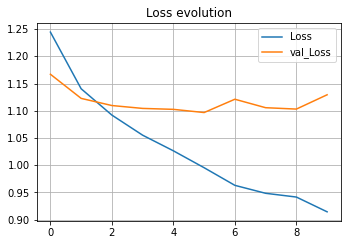

In [119]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.legend()
plt.grid()
plt.title('Loss evolution')

Text(0.5, 1.0, 'Accuracy evolution')

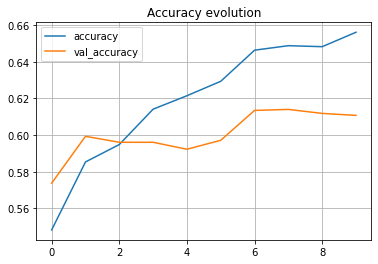

In [120]:
plt.subplot(1, 1, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.grid()
plt.title('Accuracy evolution')